In [61]:
### Machine Learning

In [116]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import linkage, dendrogram

In [91]:
df = pd.read_csv('customers.csv')
df.columns = ['cid', 'gender', 'age', 'income', 'spending_score']

df.head()

,cid,gender,age,income,spending_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [92]:
df = df[['age', 'spending_score']]

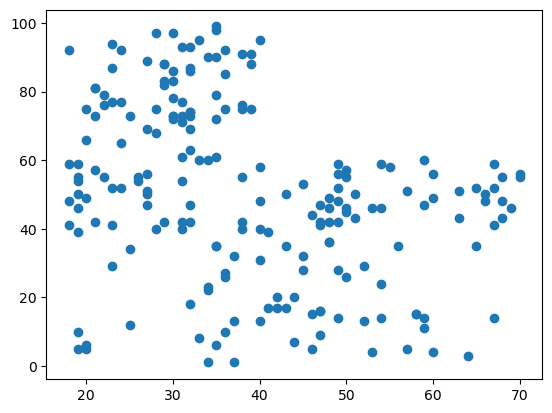

In [93]:
plt.scatter(df.age, df.spending_score)

In [94]:
# applying k-means

my_kmeans = KMeans(3)
my_kmeans.fit(df)

KMeans(n_clusters=3)

In [95]:
# gives coordinates of cluster centers
my_kmeans.cluster_centers_

array([[43.02173913, 47.59782609],
       [29.56451613, 80.74193548],
       [43.02173913, 14.23913043]])

In [96]:
# inertia is the error (sum of distances between instances between clusters)
# smaller inertia is better

my_kmeans.inertia_

45844.53681626929

In [97]:
### How do we determine the number of clusters

In [98]:
errors = []
for n in range(1, 10):
    my_kmeans = KMeans(n)
    my_kmeans.fit(df)
    errors.append(my_kmeans.inertia_)

errors

[171535.5,
 75949.15601023017,
 45840.67661610867,
 28172.70509250611,
 23907.65915694681,
 19846.757755975435,
 15690.720912128807,
 13432.798949235463,
 12079.746489515728]

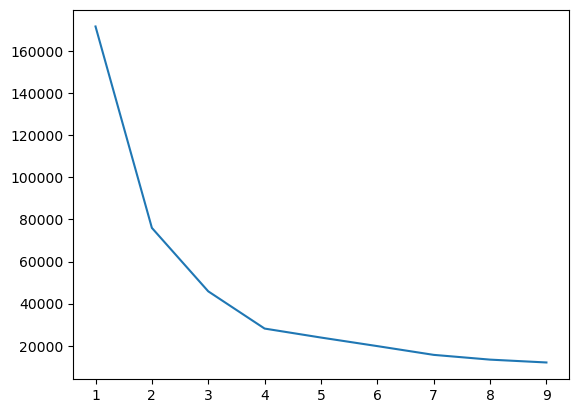

In [99]:
plt.plot(range(1, 10), errors)

In [100]:
# Use elbow criterion, don't just pick lowest error (overfitting)
# find point after which  the error does not significantly decrease
# in the above case it is 4

In [101]:
# now doing it with best # clusters

my_kmeans = KMeans(4)
my_kmeans.fit(df)
df['clusters'] = my_kmeans.labels_

In [102]:
df

,age,spending_score,clusters
0,19,39,3
1,21,81,0
2,20,6,1
3,23,77,0
4,31,40,3
...,...,...,...
195,35,79,0
196,45,28,1
197,32,74,0
198,32,18,1


In [103]:
# can also do it using silhouette scores
silhouette_scores = []
for n in range(2, 10):
    my_kmeans = KMeans(n)
    my_kmeans.fit(df)
    score = silhouette_score(df, my_kmeans.labels_)
    silhouette_scores.append(score)

# unlike error, here the max number is better
print("The best num of clusters is:", np.argmax(silhouette_scores) + 2)

The best num of clusters is: 4


In [104]:
### visualizing the center resutls

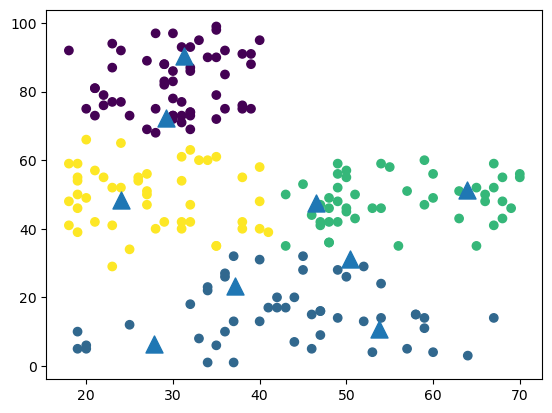

In [105]:
plt.scatter(df.age, df.spending_score, c = df['clusters'])
# finding clusters
plt.scatter(my_kmeans.cluster_centers_[:, 0], my_kmeans.cluster_centers_[:, 1], s = 150, marker = '^')

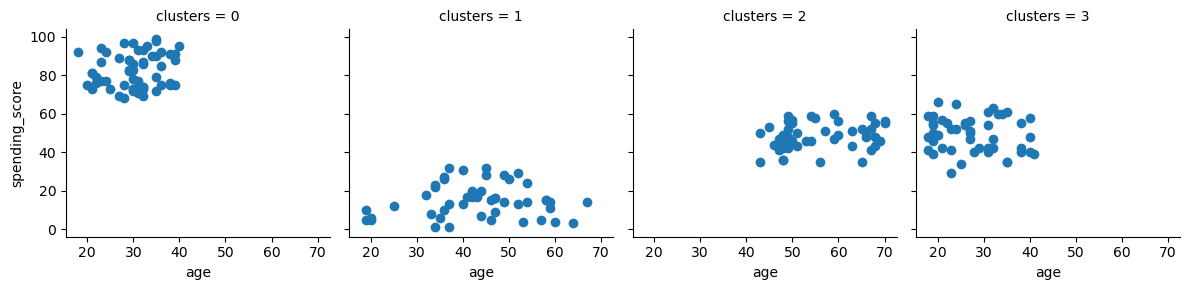

In [106]:
sns.FacetGrid(data = df, col = 'clusters').map(plt.scatter, 'age', 'spending_score')

In [107]:
df.loc[df['clusters'] == 3, :]

,age,spending_score,clusters
0,19,39,3
4,31,40,3
16,35,35,3
17,20,66,3
20,35,35,3
27,35,61,3
43,31,61,3
45,24,65,3
47,27,47,3
48,29,42,3


In [110]:
# different clustering technique

In [111]:
# agglomerative

# my_agg = AgglomerativeClustering(NumClusters)

In [113]:
my_agg = AgglomerativeClustering(4)
my_agg.fit(df)

AgglomerativeClustering(n_clusters=4)

In [114]:
my_agg.labels_

array([0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 0, 0, 3, 0, 3,
       2, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 1, 3, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 3, 0, 3, 0, 3, 2, 3, 2, 3,
       0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 1, 3, 2, 3, 0, 3, 2, 3, 2, 1, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 0, 3, 2, 3, 0, 3, 0, 3, 2, 3, 2, 3, 2, 3, 2, 3, 0, 3,
       2, 3])

In [117]:
# another way

In [119]:
my_linkage = linkage(df)

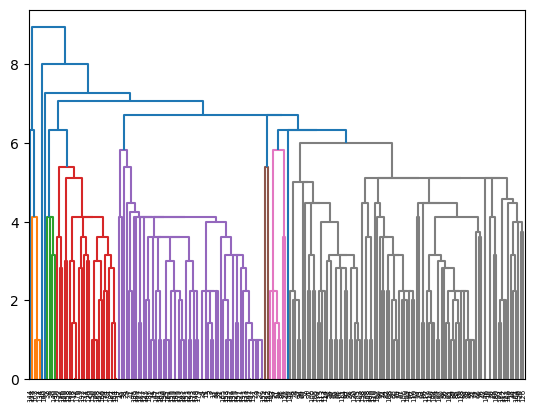

In [120]:
dendrogram(my_linkage, orientation = 'top')
plt.show()